# Create SI figure that shows oscillatory binding curve problem & solution

In [1]:
# import libraries & packages

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.offsetbox import AnchoredText
import matplotlib.cm as cm
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib
from glob import glob


import assaytools


from assaytools import platereader

In [2]:
# define ligand concentration array

concentrations = np.array([  0.00000000e+00,   8.00000000e-09,   1.34778097e-08,
         2.27064194e-08,   3.82541000e-08,   6.44476851e-08,
         1.08576705e-07,   1.82922021e-07,   3.08173524e-07,
         5.19188015e-07,   8.74689659e-07,   1.47361260e-06, 2.48263378e-06,
         4.18255821e-06, 7.04646547e-06, 1.118713651e-05, 2.0e-05])

## WT Src: Bosutinib

In [ ]:
# get data for assay format 1 (need to do formats separately since protein:ligand pairs are in different wells)

def get_data_format1(assay_format):

    # load files 
    filenames = sorted(glob('infinite_results/no_dialysis/*.xml'))
    filenames.sort(key=os.path.getmtime)

    # read files 
    reads = list()
    nreads = len(filenames)
    for read in range(nreads):
        read = platereader.read_icontrol_xml(filenames[read])
        reads.append(read)

    # extract and organize data across ligand concentration
    label = 'ex280_scan_top_gain100'
    well_prot = 'B7'
    well_buff = 'A2'

    measurements_prot = [reads[i][label][well_prot]['480'] for i in range(nreads)]
    measurements_buff = [reads[i][label][well_buff]['480'] for i in range(nreads)]
    for i in range(nreads):
        measurements_prot = [x if x != 'OVER' else 0 for x in measurements_prot]
        measurements_prot = [float(i) for i in measurements_prot] 
        measurements_buff = [x if x != 'OVER' else 0 for x in measurements_buff]
        measurements_buff = [float(i) for i in measurements_buff]
    
    return(measurements_prot, measurements_buff)

In [ ]:
# get data for assay formats 2-4

def get_data_formats(assay_format):

    # load files 
    filenames = sorted(glob('infinite_results/%s/*.xml' %(assay_format)))
    filenames.sort(key=os.path.getmtime)

    # read files 
    reads = list()
    nreads = len(filenames)
    for read in range(nreads):
        read = platereader.read_icontrol_xml(filenames[read])
        reads.append(read)

    # extract and organize data across ligand concentration
    label = 'ex280_em480_top_gain100'
    well_prot = 'A8'
    well_buff = 'A11'

    measurements_prot = [reads[i][label][well_prot] for i in range(nreads)]
    measurements_buff = [reads[i][label][well_buff] for i in range(nreads)]
    for i in range(nreads):
        measurements_prot = [x if x != 'OVER' else 0 for x in measurements_prot]
        measurements_prot = [float(i) for i in measurements_prot] 
        measurements_buff = [x if x != 'OVER' else 0 for x in measurements_buff]
        measurements_buff = [float(i) for i in measurements_buff]

    return(measurements_prot, measurements_buff)

In [ ]:
format_1 = get_data_format1('no_dialysis')

format_2 = get_data_formats('UV')

format_3 = get_data_formats('NB')

format_4 = get_data_formats('COC')

print(format_1)
print(format_2)
print(format_3)
print(format_4)

In [ ]:
index = 0

fig,axes = plt.subplots(nrows=1, ncols=1, figsize=[8,6])

current_palette = sns.color_palette('colorblind',10)
sns.set_palette(current_palette)

x_values = concentrations

sns.set_palette(current_palette)
sns.set_style(style='white')

plt.semilogx(x_values, format_1[0], c=current_palette[0], linestyle='-.', marker='o', label='Format 1, no dialysis')
plt.semilogx(x_values, format_1[1], c=current_palette[0], linestyle=':', label='Format 1, no dialysis')
plt.semilogx(x_values, format_2[0], c=current_palette[0], marker='o', label='Format 2, 4ti-0234 plate')
plt.semilogx(x_values, format_2[1], c=current_palette[0], linestyle='--', label='Format 2, 4ti-0234 plate')
plt.semilogx(x_values, format_3[0], c=current_palette[1], marker='o', label='Format 3, Corning 3651 plate')
plt.semilogx(x_values, format_3[1], c=current_palette[1], linestyle='--', label='Format 3, Corning 3651 plate')
plt.semilogx(x_values, format_4[0], c=current_palette[2], marker='o', label='Format 4, Greiner Bio-One 655809 plate')
plt.semilogx(x_values, format_4[1], c=current_palette[2], linestyle='--', label='Format 4, Greiner Bio-One 655809 plate') 
    
plt.xlim(0,4e-5)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(loc='upper left')

plt.title('WT Src:Bosutinib', fontsize=20)
plt.xlabel('[Bosutinib](M)', fontsize=18)
plt.ylabel('Fluorescence Intensity (rfu)', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=12)
sns.despine()

fig.savefig('20190710_oscillatory_trace_Src_Bos_v2.pdf', bbox_inches='tight', dpi=300)
fig.savefig('20190710_oscillatory_trace_Src_Bos_v2.svg', bbox_inches='tight', dpi=300)

## Do the same for a protein ligand pair with lower affinity (Abl GK:Gefitinib)

In [3]:
# get data for assay format 1 (need to do formats separately since protein:ligand pairs are in different wells)

def get_data_formats_abl_1(assay_format):
    # load files 
    filenames = sorted(glob('infinite_results/no_dialysis/*.xml'))
    filenames.sort(key=os.path.getmtime)

    # read files 
    reads = list()
    nreads = len(filenames)
    for read in range(nreads):
        read = platereader.read_icontrol_xml(filenames[read])
        reads.append(read)

    # extract and organize data across ligand concentration
    label = 'ex280_scan_top_gain100'
    well_prot = 'H5'
    well_buff = 'G2'

    measurements_prot = [reads[i][label][well_prot]['480'] for i in range(nreads)]
    measurements_buff = [reads[i][label][well_buff]['480'] for i in range(nreads)]
    for i in range(nreads):
        measurements_prot = [x if x != 'OVER' else 0 for x in measurements_prot]
        measurements_prot = [float(i) for i in measurements_prot] 
        measurements_buff = [x if x != 'OVER' else 0 for x in measurements_buff]
        measurements_buff = [float(i) for i in measurements_buff]
        
    return(measurements_prot, measurements_buff)

In [4]:
# get data for assay formats 2-4

def get_data_formats_abl_2(assay_format):
    
    # load files 
    filenames = sorted(glob('infinite_results/%s/*.xml' %(assay_format)))
    filenames.sort(key=os.path.getmtime)

    # read files 
    reads = list()
    nreads = len(filenames)
    for read in range(nreads):
        read = platereader.read_icontrol_xml(filenames[read])
        reads.append(read)

    # extract and organize data across ligand concentration
    label = 'ex280_em480_top_gain100'
    well_prot = 'G5'
    well_buff = 'H5'

    measurements_prot = [reads[i][label][well_prot] for i in range(nreads)]
    measurements_buff = [reads[i][label][well_buff] for i in range(nreads)]
    for i in range(nreads):
        measurements_prot = [x if x != 'OVER' else 0 for x in measurements_prot]
        measurements_prot = [float(i) for i in measurements_prot] 
        measurements_buff = [x if x != 'OVER' else 0 for x in measurements_buff]
        measurements_buff = [float(i) for i in measurements_buff]

    return(measurements_prot, measurements_buff)

In [5]:
format_1 = get_data_formats_abl_1('no_dialysis')

format_2 = get_data_formats_abl_2('UV')

format_3 = get_data_formats_abl_2('NB')

format_4 = get_data_formats_abl_2('COC')

print(format_1)
print(format_2)
print(format_3)
print(format_4)

([350.0, 362.0, 425.0, 460.0, 452.0, 443.0, 442.0, 480.0, 543.0, 741.0, 782.0, 867.0, 925.0, 965.0, 997.0, 1339.0, 1329.0], [200.0, 226.0, 248.0, 258.0, 316.0, 293.0, 283.0, 294.0, 324.0, 386.0, 405.0, 453.0, 548.0, 669.0, 785.0, 984.0, 1152.0])
([725.0, 705.0, 715.0, 717.0, 734.0, 825.0, 911.0, 1034.0, 1286.0, 1519.0, 2006.0, 2500.0, 2796.0, 3134.0, 3321.0, 3645.0, 3914.0], [490.0, 537.0, 489.0, 495.0, 498.0, 506.0, 524.0, 540.0, 566.0, 611.0, 686.0, 766.0, 916.0, 1130.0, 1415.0, 1767.0, 2113.0])
([3019.0, 3119.0, 3126.0, 3111.0, 3279.0, 3402.0, 3639.0, 4099.0, 4804.0, 5868.0, 7288.0, 9101.0, 11229.0, 14008.0, 17524.0, 23061.0, 31816.0], [2773.0, 2771.0, 2765.0, 2779.0, 2776.0, 2778.0, 2783.0, 2831.0, 2920.0, 3095.0, 3367.0, 3895.0, 4769.0, 6359.0, 9074.0, 13717.0, 21805.0])
([1015.0, 848.0, 849.0, 875.0, 948.0, 1038.0, 1235.0, 1523.0, 1953.0, 2603.0, 3285.0, 3982.0, 4576.0, 5016.0, 5434.0, 5814.0, 6316.0], [812.0, 810.0, 785.0, 988.0, 805.0, 815.0, 841.0, 882.0, 979.0, 1178.0, 1229.0

In [ ]:
index = 0

fig,axes = plt.subplots(nrows=1, ncols=1, figsize=[8,6])

current_palette = sns.color_palette('colorblind',10)
sns.set_palette(current_palette)

x_values = concentrations

sns.set_palette(current_palette)
sns.set_style(style='white')
sns.despine()

plt.semilogx(x_values, format_1[0], c=current_palette[0], linestyle='-.', marker='o', label='Format 1, no dialysis')
plt.semilogx(x_values, format_1[1], c=current_palette[0], linestyle=':', label='Format 1, no dialysis')
plt.semilogx(x_values, format_2[0], c=current_palette[0], marker='o', label='Format 2, 4ti-0234 plate')
plt.semilogx(x_values, format_2[1], c=current_palette[0], linestyle='--', label='Format 2, 4ti-0234 plate')
plt.semilogx(x_values, format_3[0], c=current_palette[1], marker='o', label='Format 3, Corning 3651 plate')
plt.semilogx(x_values, format_3[1], c=current_palette[1], linestyle='--', label='Format 3, Corning 3651 plate')
plt.semilogx(x_values, format_4[0], c=current_palette[2], marker='o', label='Format 4, Greiner Bio-One 655809 plate')
plt.semilogx(x_values, format_4[1], c=current_palette[2], linestyle='--', label='Format 4, Greiner Bio-One 655809 plate') 

plt.xlim(0,4e-5)
plt.tick_params(axis='both', which='major', labelsize=12)


plt.title('Abl GK:Gefitinib', fontsize=20)
plt.xlabel('[Gefitinib](M)', fontsize=18)
plt.ylabel('Fluorescence Intensity (rfu)', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='upper left')

fig.savefig('20190710_oscillatory_trace_Abl_Gef_v2.pdf', bbox_inches='tight', dpi=300)
fig.savefig('20190710_oscillatory_trace_Abl_Gef_v2.svg', bbox_inches='tight', dpi=300)

# Compare problematic & solved single well and multiple well experiments for WT Src: Bos, Bos Iso, Erl

In [6]:
# define ligand concentration arrays for multiple well (12 concentrations) and single well (17 concentrations)

concentrations_multi = np.array([  0.00000000e+00,   8.00000000e-09,   1.75e-08,
         3.83e-08,   8.37e-08,   1.83e-07,
         4e-07,   8.75e-07,   1.91e-06,
         4.18e-06,   9.15e-06,   2e-05])

concentrations_single = np.array([  0.00000000e+00,   8.00000000e-09,   1.34778097e-08,
         2.27064194e-08,   3.82541000e-08,   6.44476851e-08,
         1.08576705e-07,   1.82922021e-07,   3.08173524e-07,
         5.19188015e-07,   8.74689659e-07,   1.47361260e-06, 2.48263378e-06,
         4.18255821e-06, 7.04646547e-06, 1.118713651e-05, 2.0e-05])

In [7]:
# make function to load and read filenames
def read_files(assay_format):
    filenames = sorted(glob('infinite_results/%s/*.xml' %(assay_format)))
    filenames.sort(key=os.path.getmtime)
    
    reads = list()
    nreads = len(filenames)
    for read in range(nreads):
        read = platereader.read_icontrol_xml(filenames[read])
        reads.append(read)
    return(reads)

In [8]:
# for multiple well format 5, load and read data files, then extract data for WT Src & each ligand
reads_multi = read_files('multiple_well')

# Name wells and assign corresponding measurements at 480 nm based on ligand placement in plate layout

Bos_prot = np.zeros(12)
Bos_buff = np.zeros(12)
ncol = 12
for well in range(ncol):
    index = well + 1
    prot_well_name = 'A%s' % index

    Bos_prot[well] = reads_multi[0]['ex280_scan_top_gain100'][prot_well_name]['480']
    buff_well_name = 'B%s' % index
    Bos_buff[well] = reads_multi[0]['ex280_scan_top_gain100'][buff_well_name]['480']

Bos_iso_prot = np.zeros(12)
Bos_iso_buff = np.zeros(12)
ncol = 12
for well in range(ncol):
    index = well + 1
    prot_well_name = 'C%s' % index

    Bos_iso_prot[well] = reads_multi[1]['ex280_scan_top_gain100'][prot_well_name]['480']
    buff_well_name = 'D%s' % index
    Bos_iso_buff[well] = reads_multi[1]['ex280_scan_top_gain100'][buff_well_name]['480']
    
Erl_prot = np.zeros(12)
Erl_buff = np.zeros(12)
ncol = 12
for well in range(ncol):
    index = well + 1
    prot_well_name = 'E%s' % index
    Erl_prot[well] = reads_multi[2]['ex280_scan_top_gain100'][prot_well_name]['480']
    buff_well_name = 'F%s' % index
    Erl_buff[well] = reads_multi[2]['ex280_scan_top_gain100'][buff_well_name]['480']

In [9]:
# extract data for single well format 2, break up into each ligand to mirror multiple well data extraction 

reads_single = read_files('single_well')

label_single = 'ex280_scan_top_gain100'

# get protein data
measurements_single_prot = list()
prot_well_dict = {'Bos': 'B8', 'Bos Iso': 'D8', 'Erl' :'F8'}
for lig, well in prot_well_dict.items():
    measurements = [reads_single[i][label_single][well]['480'] for i in range(17)]
    for i in range(len(measurements)):
        measurements = list([x if x != 'OVER' else 0 for x in measurements])
        measurements = [float(i) for i in measurements]
    measurements_single_prot.append(measurements)

# get buffer data
measurements_single_buff = list()
buff_well_dict = {'Bos':'A2', 'Bos_iso':'C2', 'Erl':'E2'}
for lig, well in buff_well_dict.items():
    measurements = [reads_single[i][label_single][well]['480'] for i in range(17)]
    for i in range(len(measurements)):
        measurements = list([x if x != 'OVER' else 0 for x in measurements])
        measurements = [float(i) for i in measurements]
    measurements_single_buff.append(measurements)

In [10]:
# for multiple well format 5, load and read data files, then extract data for WT Src & each ligand
reads_multi = read_files('multiple_well_NB')

# Name wells and assign corresponding measurements at 480 nm based on ligand placement in plate layout

Bos_prot_NB = np.zeros(12)
Bos_buff_NB = np.zeros(12)
ncol = 12
for well in range(ncol):
    index = well + 1
    prot_well_name = 'A%s' % index

    Bos_prot_NB[well] = reads_multi[0]['ex280_scan_top_gain100'][prot_well_name]['480']
    buff_well_name = 'B%s' % index
    Bos_buff_NB[well] = reads_multi[0]['ex280_scan_top_gain100'][buff_well_name]['480']

Bos_iso_prot_NB = np.zeros(12)
Bos_iso_buff_NB = np.zeros(12)
ncol = 12
for well in range(ncol):
    index = well + 1
    prot_well_name = 'C%s' % index

    Bos_iso_prot_NB[well] = reads_multi[1]['ex280_scan_top_gain100'][prot_well_name]['480']
    buff_well_name = 'D%s' % index
    Bos_iso_buff_NB[well] = reads_multi[1]['ex280_scan_top_gain100'][buff_well_name]['480']
    
Erl_prot_NB = np.zeros(12)
Erl_buff_NB = np.zeros(12)
ncol = 12
for well in range(ncol):
    index = well + 1
    prot_well_name = 'E%s' % index
    Erl_prot_NB[well] = reads_multi[2]['ex280_scan_top_gain100'][prot_well_name]['480']
    buff_well_name = 'F%s' % index
    Erl_buff_NB[well] = reads_multi[2]['ex280_scan_top_gain100'][buff_well_name]['480']

In [11]:
# extract data for solved single well, break up into each ligand to mirror multiple well data extraction 

reads_single = read_files('solved_single_well')

label_single = 'ex280_em480_top_gain100'

# get protein data
measurements_solved_single_prot = list()
prot_well_dict = {'Bos': 'B8', 'Bos Iso': 'D8', 'Erl' :'F8'}
for lig, well in prot_well_dict.items():
    measurements = [reads_single[i][label_single][well] for i in range(17)]
    for i in range(len(measurements)):
        measurements = list([x if x != 'OVER' else 0 for x in measurements])
        measurements = [float(i) for i in measurements]
    measurements_solved_single_prot.append(measurements)

# get buffer data
measurements_solved_single_buff = list()
buff_well_dict = {'Bos':'A2', 'Bos_iso':'C2', 'Erl':'E2'}
for lig, well in buff_well_dict.items():
    measurements = [reads_single[i][label_single][well] for i in range(17)]
    for i in range(len(measurements)):
        measurements = list([x if x != 'OVER' else 0 for x in measurements])
        measurements = [float(i) for i in measurements]
    measurements_solved_single_buff.append(measurements)

In [ ]:
# create plotting function

def plot(color_single, color_multi, single_prot, single_buff, lig_num, lig_prot, lig_buff, title, single_format, single_descriptor, multi_format, multi_descriptor):
    current_palette = sns.color_palette('colorblind')
    
    plt.semilogx(concentrations_single, format_1)
    plt.semilogx(concentrations_single, single_prot[lig_num], c=current_palette[color_single], marker='.', markersize=16, alpha=0.8)
    plt.semilogx(concentrations_single, single_buff[lig_num], c=current_palette[color_single], linestyle='--', alpha=0.8)
    plt.semilogx(concentrations_multi, np.flip(lig_prot, axis=0), c=current_palette[color_multi], marker='s', markersize=8, alpha=0.8)
    plt.semilogx(concentrations_multi, np.flip(lig_buff, axis=0), c=current_palette[color_multi], linestyle='-.',alpha=0.8)
    ax1.set_ylim(10**2, 60000)

    ax1.yaxis.set_tick_params(labelsize=18)
    ax1.xaxis.set_tick_params(labelsize=18)
    plt.minorticks_off()
    plt.legend(['Format %s: %s' %(single_format, single_descriptor), 'Format %s: %s' %(single_format, single_descriptor), 'Format %s: %s' %(multi_format, multi_descriptor), 'Format %s: %s' %(multi_format, multi_descriptor)], loc=2, prop={'size': 16})
    plt.title(title, fontsize=28)
    
    sns.set_style(style='white')
    sns.despine()

In [ ]:
## make 6 plots, one for each ligand at 480 nm Em

fig = plt.figure(figsize=(30,12), dpi=300)

ax1 = fig.add_subplot(2,3,1)
Src_bos_initial = plot(color_single=0, color_multi=0, single_prot=measurements_single_prot, single_buff=measurements_single_buff, lig_num=0, lig_prot=Bos_prot, lig_buff=Bos_buff, 
                       title='WT Src:Bosutinib', single_format='2', single_descriptor='4ti-0234 plate', 
                       multi_format='5', multi_descriptor='4ti-0234 plate')

ax1 = fig.add_subplot(2,3,2)
Src_bos_iso_initial = plot(color_single=0, color_multi=0, single_prot=measurements_single_prot, single_buff=measurements_single_buff, lig_num=1, lig_prot=Bos_iso_prot, lig_buff=Bos_iso_buff, 
                       title='WT Src:Bosutinib Isomer', single_format='2', single_descriptor='4ti-0234 plate', 
                       multi_format='5', multi_descriptor='4ti-0234 plate')

ax1 = fig.add_subplot(2,3,3)
Src_erl_initial = plot(color_single=0, color_multi=0, single_prot=measurements_single_prot, single_buff=measurements_single_buff, lig_num=2, lig_prot=Erl_prot, lig_buff=Erl_buff, 
                       title='WT Src:Erlotinib', single_format='2', single_descriptor='4ti-0234 plate', 
                       multi_format='5', multi_descriptor='4ti-0234 plate')

ax1 = fig.add_subplot(2,3,4)
Src_bos_solved = plot(color_single=1, color_multi=1, single_prot=measurements_solved_single_prot, single_buff=measurements_solved_single_buff, lig_num=0, lig_prot=Bos_prot_NB, lig_buff=Bos_buff_NB, 
                       title='WT Src:Bosutinib', single_format='3', single_descriptor='Corning 3651 plate', 
                       multi_format='6', multi_descriptor='Corning 3651 plate')

ax1 = fig.add_subplot(2,3,5)
Src_bos_iso_solved = plot(color_single=1, color_multi=1, single_prot=measurements_solved_single_prot, single_buff=measurements_solved_single_buff, lig_num=1, lig_prot=Bos_iso_prot_NB, lig_buff=Bos_iso_buff_NB, 
                       title='WT Src:Bosutinib Isomer', single_format='3', single_descriptor='Corning 3651 plate', 
                       multi_format='6', multi_descriptor='Corning 3651 plate')

ax1 = fig.add_subplot(2,3,6)
Src_erl_solved = plot(color_single=1, color_multi=1, single_prot=measurements_solved_single_prot, single_buff=measurements_solved_single_buff, lig_num=2, lig_prot=Erl_prot_NB, lig_buff=Erl_buff_NB, 
                       title='WT Src:Erlotinib', single_format='3', single_descriptor='Corning 3651 plate', 
                       multi_format='6', multi_descriptor='Corning 3651 plate')

axis = plt.gca()
plt.ylabel('Fluorescence Units (rfu)', fontsize=40)
axis.yaxis.set_label_coords(-2.6,1.25)
plt.xlabel('Ligand Concentration (M)', fontsize=45)
axis.xaxis.set_label_coords(-0.65,-0.15)

fig.savefig('20190710_rfu_comparison_multi_vs_single_WT Src_dialyzed_v2.pdf', dpi=300, bbox='tight')
fig.savefig('20190710_rfu_comparison_multi_vs_single_WT Src_dialyzed_v2.svg', dpi=300, bbox='tight')

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)


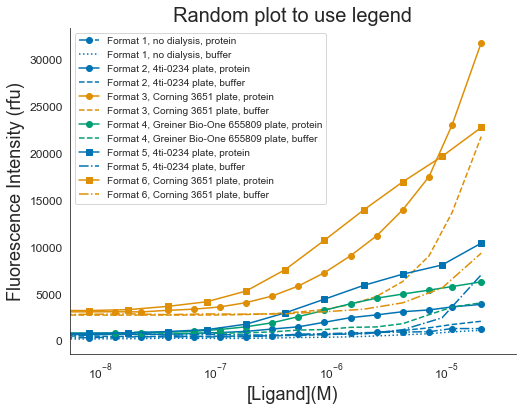

In [17]:
# create plot with all formats to use legend in paper figure

index = 0

fig,axes = plt.subplots(nrows=1, ncols=1, figsize=[8,6])

current_palette = sns.color_palette('colorblind',10)
sns.set_palette(current_palette)

x_values = concentrations

sns.set_palette(current_palette)
sns.set_style(style='white')
sns.despine()

plt.semilogx(x_values, format_1[0], c=current_palette[0], linestyle='-.', marker='o', label='Format 1, no dialysis, protein')
plt.semilogx(x_values, format_1[1], c=current_palette[0], linestyle=':', label='Format 1, no dialysis, buffer')
plt.semilogx(x_values, format_2[0], c=current_palette[0], marker='o', label='Format 2, 4ti-0234 plate, protein')
plt.semilogx(x_values, format_2[1], c=current_palette[0], linestyle='--', label='Format 2, 4ti-0234 plate, buffer')
plt.semilogx(x_values, format_3[0], c=current_palette[1], marker='o', label='Format 3, Corning 3651 plate, protein')
plt.semilogx(x_values, format_3[1], c=current_palette[1], linestyle='--', label='Format 3, Corning 3651 plate, buffer')
plt.semilogx(x_values, format_4[0], c=current_palette[2], marker='o', label='Format 4, Greiner Bio-One 655809 plate, protein')
plt.semilogx(x_values, format_4[1], c=current_palette[2], linestyle='--', label='Format 4, Greiner Bio-One 655809 plate, buffer')
plt.semilogx(concentrations_multi, np.flip(Erl_prot, axis=0), c=current_palette[0], marker='s', label='Format 5, 4ti-0234 plate, protein')
plt.semilogx(concentrations_multi, np.flip(Erl_buff, axis=0), c=current_palette[0], linestyle='-.', label='Format 5, 4ti-0234 plate, buffer') 
plt.semilogx(concentrations_multi, np.flip(Erl_prot_NB, axis=0), c=current_palette[1], marker='s', label='Format 6, Corning 3651 plate, protein')
plt.semilogx(concentrations_multi, np.flip(Erl_buff_NB, axis=0), c=current_palette[1], linestyle='-.', label='Format 6, Corning 3651 plate, buffer') 

plt.xlim(0,4e-5)
plt.tick_params(axis='both', which='major', labelsize=12)


plt.title('Random plot to use legend', fontsize=20)
plt.xlabel('[Ligand](M)', fontsize=18)
plt.ylabel('Fluorescence Intensity (rfu)', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='upper left')

fig.savefig('20190711_oscillatory_trace_legened.pdf', bbox_inches='tight', dpi=300)
fig.savefig('20190711_oscillatory_trace_legened.svg', bbox_inches='tight', dpi=300)